## Name and ID

Name: Lexi Shewchuk (ashewc01)
ID: 1331654

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list
mlp_lbfgs_relu_list = list()
mlp_lbfgs_relu_loss = list()
zero_list = list()
nonzero_list = list()


n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )

    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.4f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    mlp_lbfgs_relu_loss.append(mlp_lbfgs.loss_)
    
    if mlp_lbfgs.loss_ <= 0.001:
        zero_list.append(elapsed_time_sec)
    else:
        nonzero_list.append(elapsed_time_sec)

    mlp_lbfgs_relu_list.append(mlp_lbfgs)

print('\nNonzero loss average run time:   %4f' % np.mean(nonzero_list))
print('Zero loss average run time: %4f' % np.mean(zero_list))
print('\nAvg loss: %4f' % np.mean(mlp_lbfgs_relu_loss))


finished LBFGS run  1/16 after 0.1673 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after 0.0614 sec |  28 iters | converged    | loss 0.477
finished LBFGS run  3/16 after 0.0247 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after 0.0495 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after 0.0656 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after 0.0395 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after 0.0340 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after 0.0454 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after 0.0535 sec |  15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after 0.0274 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after 0.1004 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after 0.0671 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

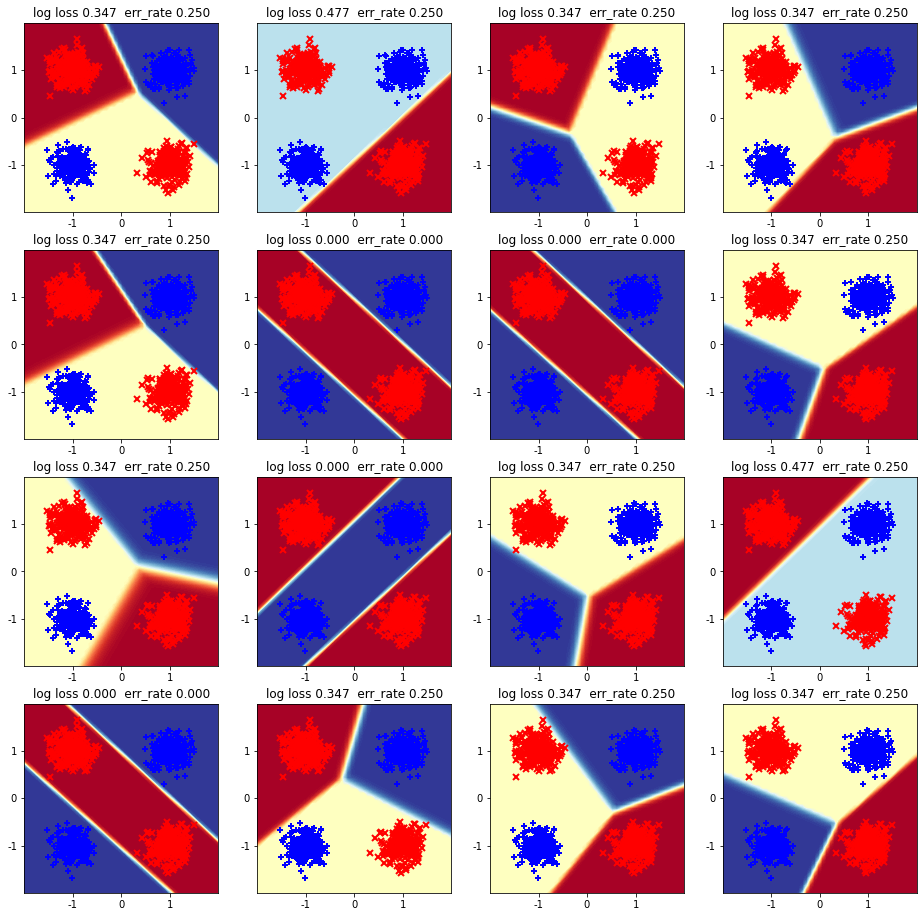

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(len(mlp_lbfgs_relu_list)):
    plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_list[i], x_tr_N2, y_tr_N, ax=ax_grid[i // 4, i % 4])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:
4 of 16 (25%) of the runs reach zero . While all models converge at a minimum (menaing that the change in loss between iterations is less than the tolderance 1e-4), there are only 4 models that converge to the global minimum -- all 12 other models converge to a local minimum and can't perfectly classify all data. For models that have 'zero' loss (which isn't actually zero, but still gives 100% accuracy), the average runtime is 0.038809s, while other models have an average runtime of 0.072581s -- almost twice as bad. This is because once the model's loss reaches a certain very low value (in this case, all 'zero'-loss models have loss < 0.001), the model is done fitting, so the loops of weight adjustments ends; for other models, the weights stop changing by a substantial amount -- because they reached a local minimum -- so the model stops trying to adjust.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation

# Save each run's trained classifier object in a list
mlp_lbfgs_log_list = list()
mlp_lbfgs_log_loss = list()
zero_list = list()
nonzero_list = list()

n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )

    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.4f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    mlp_lbfgs_log_loss.append(mlp_lbfgs.loss_)

    if mlp_lbfgs.loss_ <= 0.001:
        zero_list.append(elapsed_time_sec)
    else:
        nonzero_list.append(elapsed_time_sec)

    mlp_lbfgs_log_list.append(mlp_lbfgs)

print('\nNonzero loss average run time:   %4f' % np.mean(nonzero_list))
print('Zero loss average run time: %4f' % np.mean(zero_list))
print('\nAvg loss: %4f' % np.mean(mlp_lbfgs_log_loss))

finished LBFGS run  1/16 after 0.1545 sec |  61 iters | converged    | loss 0.000
finished LBFGS run  2/16 after 0.1192 sec | 125 iters | converged    | loss 0.347
finished LBFGS run  3/16 after 0.0420 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after 0.0821 sec |  81 iters | converged    | loss 0.000
finished LBFGS run  5/16 after 0.0297 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after 0.0338 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after 0.0416 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  8/16 after 0.0417 sec |  42 iters | converged    | loss 0.477
finished LBFGS run  9/16 after 0.0502 sec |  61 iters | converged    | loss 0.347
finished LBFGS run 10/16 after 0.0898 sec |  89 iters | converged    | loss 0.347
finished LBFGS run 11/16 after 0.0772 sec |  84 iters | converged    | loss 0.347
finished LBFGS run 12/16 after 0.0778 sec |  94 iters | converged    | loss 0.347
finished LBFGS r

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

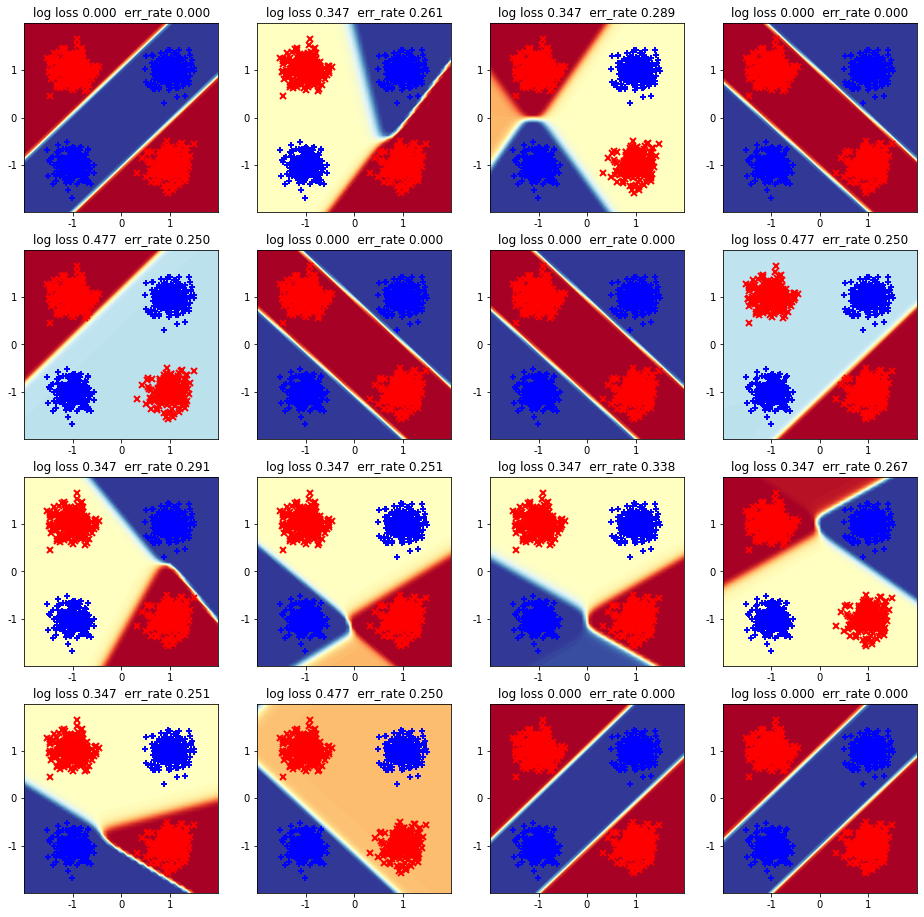

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(len(mlp_lbfgs_log_list)):
    plot_pretty_probabilities_for_clf(mlp_lbfgs_log_list[i], x_tr_N2, y_tr_N, ax=ax_grid[i // 4, i % 4])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:
With the logistic activation function, we see 6 of the 16 (38%) models reach zero training error. The other models also converge, but not at the global minumum, which is why they still have error despite the data being fully non-linearly separable. The runtimes between the zero and non-zero models are 0.196299s vs 0.243765s -- both of which are 2-3 times worse than the ReLU. This is likely because the logisitc function and its gradient are more computationally expensive to calculate, so the errors and weight adjustments take longer to occur.

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

mlp_sgd_relu_list = list()
mlp_sgd_relu_loss = list()
conv_list = list()
nonconv_list = list()

n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )

    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    mlp_sgd_relu_loss.append(mlp_sgd.loss_)

    if mlp_sgd.did_converge == True:
        conv_list.append(elapsed_time_sec)
    else:
        nonconv_list.append(elapsed_time_sec)

    mlp_sgd_relu_list.append(mlp_sgd)

print('\nConverging loss average run time:   %4f' % np.mean(conv_list))
print('Nonconverging loss average run time: %4f' % np.mean(nonconv_list))
print('\nAvg loss: %4f' % np.mean(mlp_sgd_relu_loss))

finished SGD run  1/16 after   11.0 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after   10.7 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    9.1 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   17.4 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after   10.8 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   14.1 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   19.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after   12.0 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    9.9 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   17.8 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after   18.4 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after   15.8 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

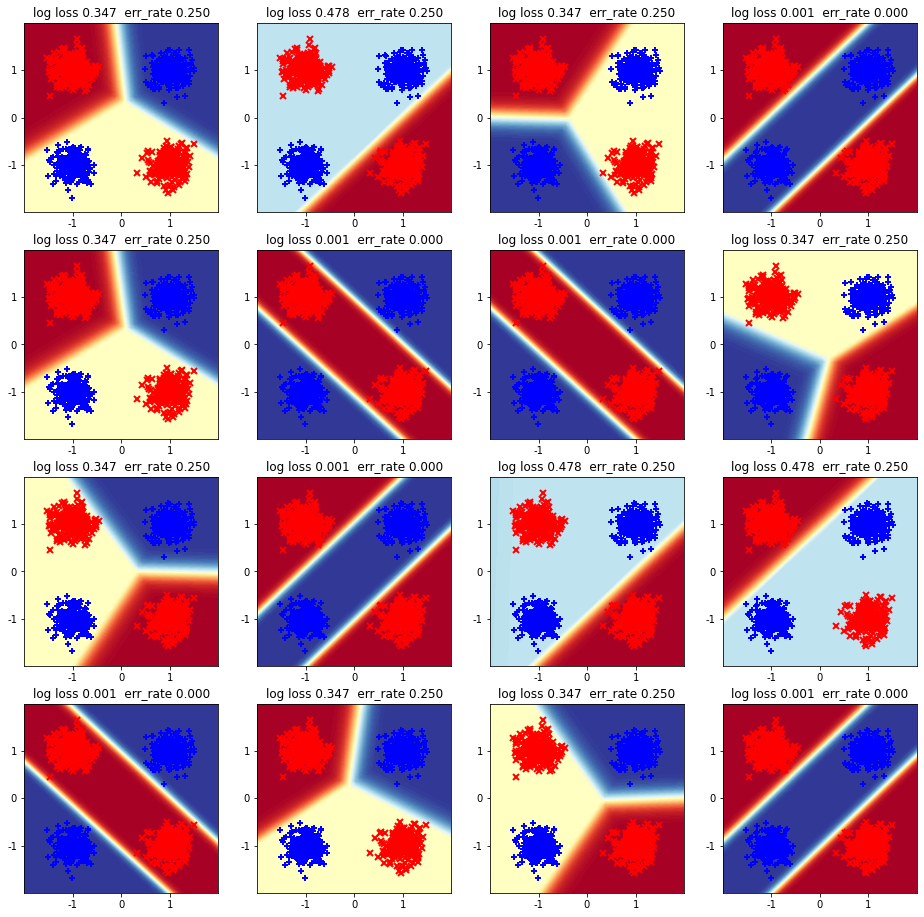

In [8]:
# TODO edit to plot all 16 runs from above
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(len(mlp_sgd_relu_list)):
    plot_pretty_probabilities_for_clf(mlp_sgd_relu_list[i], x_tr_N2, y_tr_N, ax=ax_grid[i//4, i%4])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:
6 out of 16 (38%) models essentially get to zero (less than 0.01) loss / 100% accuracy. The others show patterns similar to those in the L-BFGS ReLU models. It's interesting that it's not necessarily the case that a model has to converge to get zero error, which intuitively I would have assumed. I read that SGD is often more jumpy than BFGS because it doesnt use the second derivative -- it would make sense that models struggle to converge because the weight adjustment is never super small, so they have to go through all 400 epochs. The models that did converge -- which are not necessarily the models with zero loss -- have faster runtimes by about 8 seconds, but these are also the models that get stuck in local minima. When the model doesn't have to go through 100+ epochs, it spares a lot of calculations and can be fit significantly faster. 

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**:
SGD takes way longer to run and often doesn't converge, while L-BFGS always converges and is very fast. Based on my limited understanding of BFGS, I would guess that because BFGS uses the first and second derivative, it understands the behavior of the loss curve better, and adjusts the weights more precisely. This means it gets stuck in the curvature of the minimum without being able to escape. SGD only uses the first derivative, so it might be more jumpy, and can thus escape from local minima. However, SDG is literally 300 times slower, probably because it jumps around and has to go through so many different calculations from all the batches.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [10]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation

mlp_sgd_log_list = list()
mlp_sgd_log_loss = list()
conv_list = list()
nonconv_list = list()
loss_list = list()

n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )

    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    mlp_sgd_log_loss.append(mlp_sgd.loss_)

    if mlp_sgd.did_converge == True:
        conv_list.append(elapsed_time_sec)
    else:
        nonconv_list.append(elapsed_time_sec)

    mlp_sgd_log_list.append(mlp_sgd)

print('\nConverging loss average run time:   %4f' % np.mean(conv_list))
print('Nonconverging loss average run time: %4f' % np.mean(nonconv_list))
print('\nAvg loss: %4f' % np.mean(mlp_sgd_log_loss))


finished SGD run  1/16 after    8.6 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after   22.8 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after   21.5 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  4/16 after    7.0 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after   17.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after   19.2 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after   16.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  8/16 after   13.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after   16.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after   18.9 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 11/16 after    5.2 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after   15.8 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

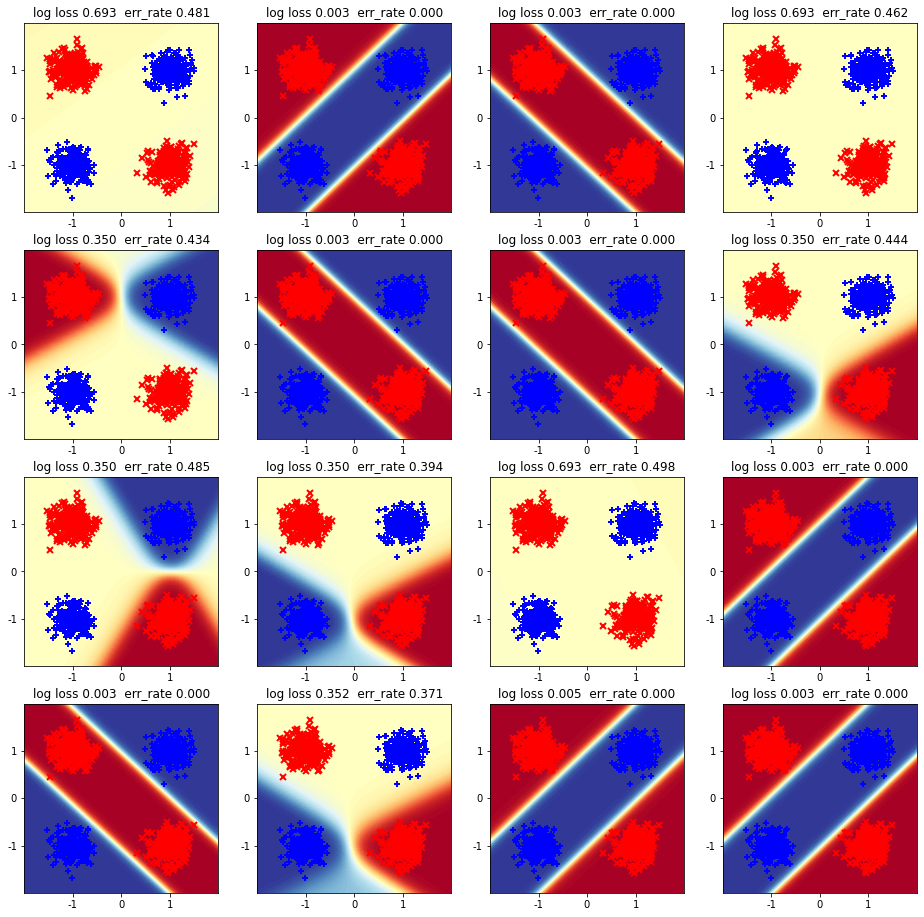

In [11]:
# TODO edit to plot all 16 runs from previous step
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(len(mlp_sgd_log_list)):
    plot_pretty_probabilities_for_clf(mlp_sgd_log_list[i], x_tr_N2, y_tr_N, ax=ax_grid[i//4, i%4])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:
8 of the 16 (50%) of the models acheive zero training error. The others don't because their losses gets stuck in local minima and can't fully separate the data. Models that converge take about 9.408447s to run on average, while non-converging models, which have to go through all 400 epochs of SGD, take 19.733860s -- over twice as long.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**:
SGD takes way longer but also yields more accurate models. SGD, as mentioned before, is jumpier because it doesn't use the second derivative like L-BFGS, so it adjusts less smoothly and can often escape from local minima. 

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

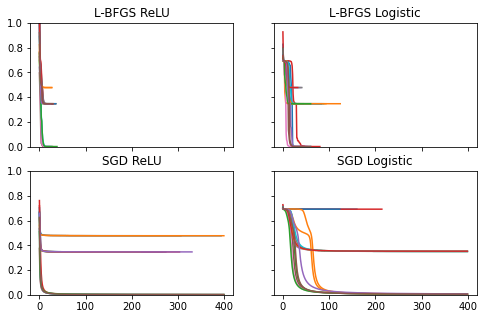

In [12]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
for i in mlp_lbfgs_relu_list:
    ax_grid[0,0].plot(i.loss_curve_)  

ax_grid[0,1].set_title('L-BFGS Logistic')
for i in mlp_lbfgs_log_list:
    ax_grid[0,1].plot(i.loss_curve_)  
    
ax_grid[1,0].set_title('SGD ReLU')
for i in mlp_sgd_relu_list:
    ax_grid[1,0].plot(i.loss_curve_)  

ax_grid[1,1].set_title('SGD Logistic')
for i in mlp_sgd_log_list:
    ax_grid[1,1].plot(i.loss_curve_)  

plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:**
For this data, the logistic gives more models that have perfect accuracy, but the ReLU is faster and is thus better optimized for the problem. We're looking to find a model that perfectly classifies the training data, so it's better to run 10 models that might not be as accurate than 5 models that take more than twice as long. These are the average losses for each model:
    LBFGS ReLU: 0.276296
    LBFGS Log:  0.241207
    SGD ReLU:   0.241974
    SGD Log:    0.242540
As you can see, the loss doesn't change too much, but the runtime is worse for logistic, so it'd be best to use the ReLU.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**:
1. Alter the starting weights and their randomness. You can see above that logistic models sometimes get stuck in a local minimum very early on. By changing the initial weight assignments, we could try to prevent this.
2. Make the weight adjustments more jumpy. Many of the logistic models have plateau periods. If there's more jumpiness or erratic adjusment to the weights, the models might not get stuck in local minima for as long.
3. Decrease the number of iterations for logistic. None of the L-BFGS models max out their max_iter=200, so minimizing it to, e.g., 50 iterations might make it a bit faster.

For solvers, we might change the number of epochs for SGD. As seen in the above graphs, most of the SGD models are at their minimum loss by 100 epochs, so in the worst cases, 100 epochs would git rid of 300 rounds of non-super-necessary calculations. By reducing time, SGD would bcome